Decision tree and hyperparameter settings were tested on the diabetes dataset.

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
import pandas as pd

path = "datasets\diabetes.csv"

diabetes = pd.read_csv(path)

print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [81]:
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [82]:
# train-test split 
from sklearn.model_selection import train_test_split

X = diabetes.drop("Outcome", axis = 1) # features
y = diabetes["Outcome"] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# creat decision tree - gini
tree_clf_g = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf_g.fit(X_train,y_train)

# test
y_pred = tree_clf_g.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"accuracy: {accuracy}")
print(f"confusion matrix:\n {conf_matrix}")

accuracy: 0.7489177489177489
confusion matrix:
 [[129  22]
 [ 36  44]]


In [84]:
# creat decision tree - entropi
tree_clf_e = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree_clf_e.fit(X_train, y_train)

# test
y_pred = tree_clf_e.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"accuracy: {accuracy}")
print(f"confusion matrix:\n {conf_matrix}")

accuracy: 0.7748917748917749
confusion matrix:
 [[135  16]
 [ 36  44]]


In [85]:
# gini - increase max depth
tree_clf_increase = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
tree_clf_increase.fit(X_train, y_train)

y_pred = tree_clf_increase.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"accuracy: {accuracy}")
print(f"confusion matrix:\n {conf_matrix}")

accuracy: 0.696969696969697
confusion matrix:
 [[107  44]
 [ 26  54]]


In [86]:
# gini - decrease max depth
tree_clf_decrease = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_clf_decrease.fit(X_train, y_train)

y_pred = tree_clf_decrease.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"accuracy: {accuracy}")
print(f"confusion matrix:\n {conf_matrix}")

accuracy: 0.7186147186147186
confusion matrix:
 [[141  10]
 [ 55  25]]


In [87]:
# entropy - increase max depth 
tree_clf_increase_e= DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
tree_clf_increase_e.fit(X_train, y_train)

y_pred = tree_clf_increase_e.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
conf_matrix = confusion_matrix(y_pred, y_test)

print(f"accuracy: {accuracy}")
print(f"confusion matrix:\n {conf_matrix}")

accuracy: 0.70995670995671
confusion matrix:
 [[116  32]
 [ 35  48]]


In [88]:
# entropy - decrease max depth 
tree_clf_decrease_e = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_clf_decrease_e.fit(X_train, y_train)

y_pred = tree_clf_decrease_e.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
conf_matrix = confusion_matrix(y_pred, y_test)

print(f"accuracy: {accuracy}")
print(f"confusion matrix:\n {conf_matrix}")

accuracy: 0.7186147186147186
confusion matrix:
 [[141  55]
 [ 10  25]]


[Text(0.5405405405405406, 0.9166666666666666, 'Glucose <= 154.5\nentropy = 0.934\nsamples = 537\nvalue = [349, 188]\nclass = healthy'),
 Text(0.28378378378378377, 0.75, 'BMI <= 26.35\nentropy = 0.823\nsamples = 454\nvalue = [337, 117]\nclass = healthy'),
 Text(0.41216216216216217, 0.8333333333333333, 'True  '),
 Text(0.10810810810810811, 0.5833333333333334, 'Glucose <= 124.5\nentropy = 0.219\nsamples = 114\nvalue = [110, 4]\nclass = healthy'),
 Text(0.05405405405405406, 0.4166666666666667, 'DiabetesPedigreeFunction <= 0.675\nentropy = 0.085\nsamples = 94\nvalue = [93, 1]\nclass = healthy'),
 Text(0.02702702702702703, 0.25, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]\nclass = healthy'),
 Text(0.08108108108108109, 0.25, 'DiabetesPedigreeFunction <= 0.705\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]\nclass = healthy'),
 Text(0.05405405405405406, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = diabetes'),
 Text(0.10810810810810811, 0.08333333333333333, 'entro

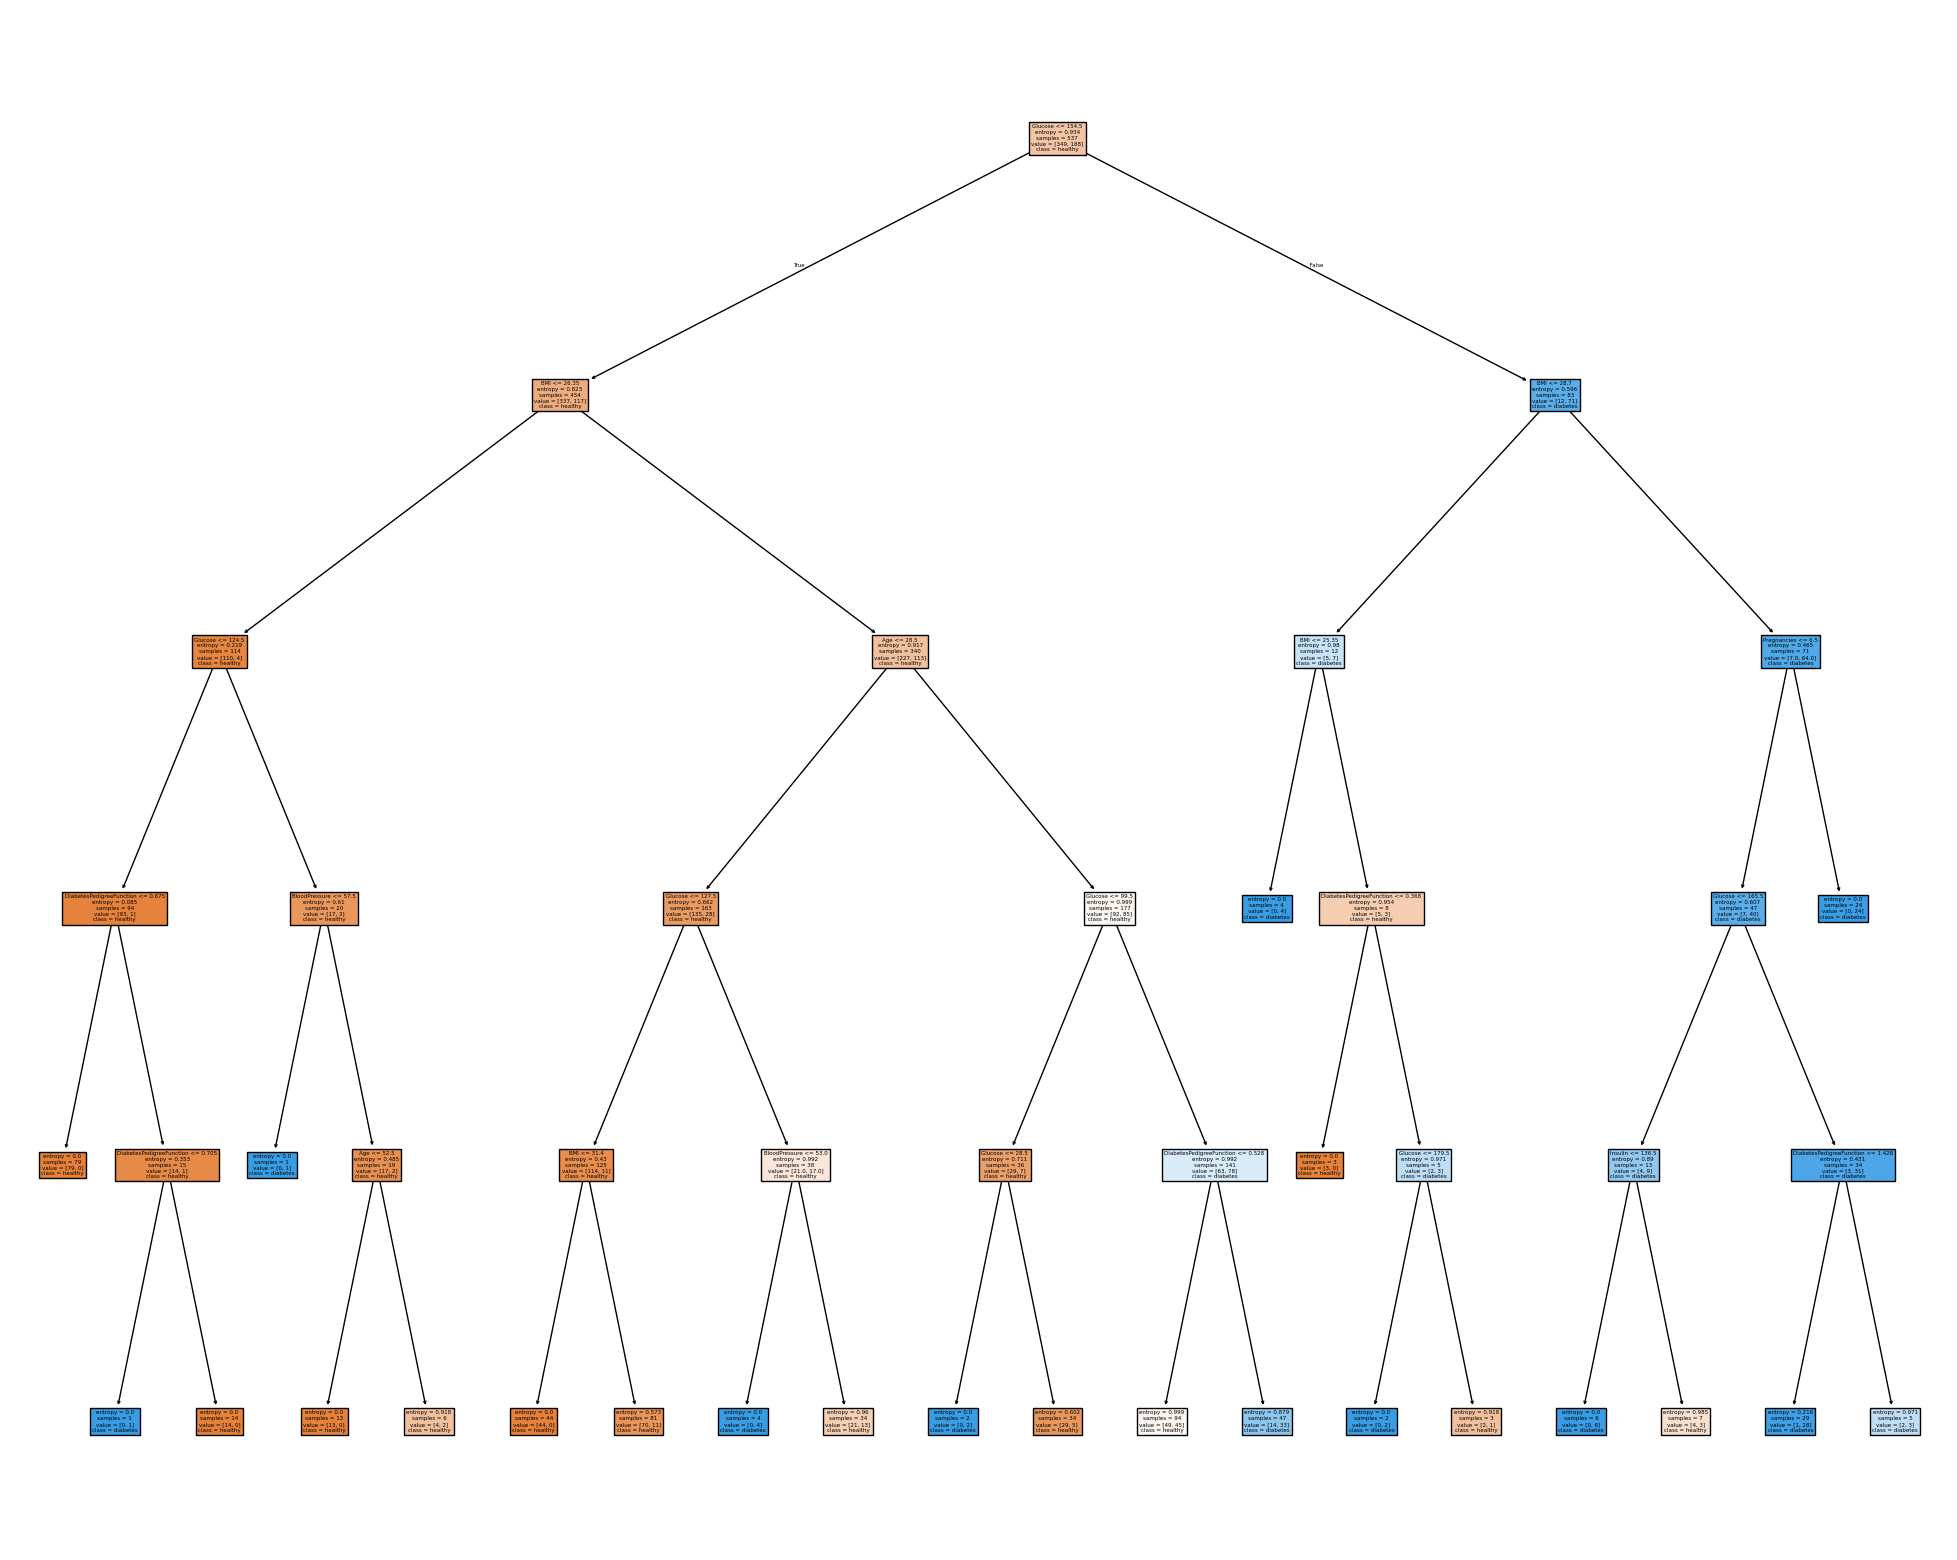

In [89]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(25, 20))
plot_tree(tree_clf_e,
          filled=True,
          feature_names=X.columns.to_list(), 
          class_names=['healthy','diabetes'])

In [90]:
# importance features
feature_importance = tree_clf_e.feature_importances_
feature_names = X.columns.to_list()

feature_importance_sort = sorted(zip(feature_importance, feature_names), reverse=True)

for importance, feature_names in feature_importance_sort:
    print(f"{feature_names}: {importance}")

Glucose: 0.5009848825952367
BMI: 0.220393122856875
Age: 0.12854771177780974
DiabetesPedigreeFunction: 0.07875219692317798
BloodPressure: 0.03340893425287792
Insulin: 0.019447567669827758
Pregnancies: 0.01846558392419485
SkinThickness: 0.0
